In [2]:
import numpy as np
import matplotlib.pyplot as plt
import giddy
import pandas as pd
import libpysal
import mapclassify as mc
import seaborn as sns
from splot.esda import lisa_cluster
sns.set_style("white")

In [7]:
import geopandas as gpd
import pandas as pd
from esda.moran import Moran
sf = gpd.read_file('features.json')
#data = pd.read_excel('temporel.xlsx')
data = pd.read_csv("per_week.csv")
data

,Lat,Long,Region,31/03/20,07/04/20,15/04/20,22/04/20,30/04/20,07/05/20,15/05/20,...,22/06/20,30/06/20,07/07/20,15/07/20,22/07/20,31/07/30,07/08/20,15/08/20,22/08/20,30/08/20
0,"-21,50216466","45,20566584",Androy,1,1,1,1,1,1,1,...,1,1,1,1,1,3,1,3,1,3
1,"-25,0333332","46,9833294",Anôsy,1,1,1,1,2,1,1,...,1,1,1,1,3,3,3,3,2,2
2,"-23,35","43,66667",Atsimo_Andrefana,1,2,1,1,2,1,1,...,1,1,1,3,3,3,3,3,2,3
3,"-22,40293","46,12576",Ihorombe,1,1,1,1,1,1,1,...,1,1,1,2,1,2,3,1,3,3
4,"-20,28416553","44,31716538",Menabe,1,1,1,1,1,1,1,...,1,1,2,1,2,1,3,3,3,3
5,"-17,166666","49,2999988",Analanjirofo,1,1,2,1,1,1,1,...,3,3,2,3,3,3,2,1,1,1
6,"-12,2666656","49,2833322",Diana,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,3,3,3
7,"-14,8833298","50,2833322",Sava,1,1,1,1,1,1,1,...,1,2,1,2,1,3,3,3,3,3
8,"-14,87239818","47,9833994",Sofia,1,1,1,1,1,1,1,...,1,1,1,2,2,3,3,3,3,3
9,"-15,71667","46,31667",Boeny,1,1,1,1,1,1,1,...,1,2,2,2,3,3,3,3,2,2


In [8]:
w = libpysal.io.open('k3.gal').read()
w.transform = 'R'

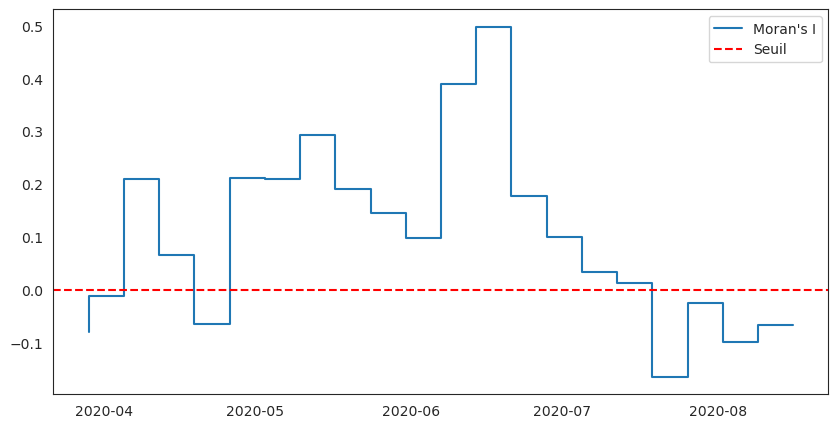

In [20]:
pci = np.array(data.iloc[:,3:]).transpose()
mits = [Moran(cs, w) for cs in pci]
date = pd.date_range(start='2020-03-25', periods=21,freq='W')
res = np.array([(mi.I, mi.EI, mi.seI_norm, mi.sim[974]) for mi in mits])
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (10,5) )
plt.step(date,res[:,0], label='Moran\'s I')
plt.axhline(y=0,xmin=0, xmax=1,color='red',linestyle="--",label='Seuil')
#ax.set_title("Global spatial autocorrelation for Covid-intensité per region Madagascar",fontdict={'fontsize':15})
ax.legend()
#plt.savefig('Moran_delaunay.pdf')
plt.savefig('Moran_k3.jpg',dpi=500)

In [10]:
import geopandas as gpd
import geoplot as gplt
#import geoviews as gv
#import geoviews.feature as gf
import xarray as xr
from cartopy import crs
import mapclassify as mc

In [11]:
sf = gpd.read_file('features.json')
df = pd.read_excel('carte.xlsx')
df

,Region,Lat,Long,case,death_case,Population
0,Androy,-24.750000,45.500000,12,0,476600
1,Anôsy,-25.033333,46.983329,95,0,809313
2,Atsimo_Andrefana,-23.350000,43.666670,173,3,1799000
3,Ihorombe,-22.402930,46.125760,16,2,418520
4,Menabe,-20.284166,44.317165,66,0,390800
5,Analanjirofo,-17.166666,49.299999,106,0,1035132
6,Diana,-12.266666,49.283332,273,14,680000
7,Sava,-14.883330,50.283332,95,2,1123000
8,Sofia,-14.872398,47.983399,145,1,985000
9,Boeny,-15.716670,46.316670,386,6,931171


In [12]:
from esda.moran import Moran_Local

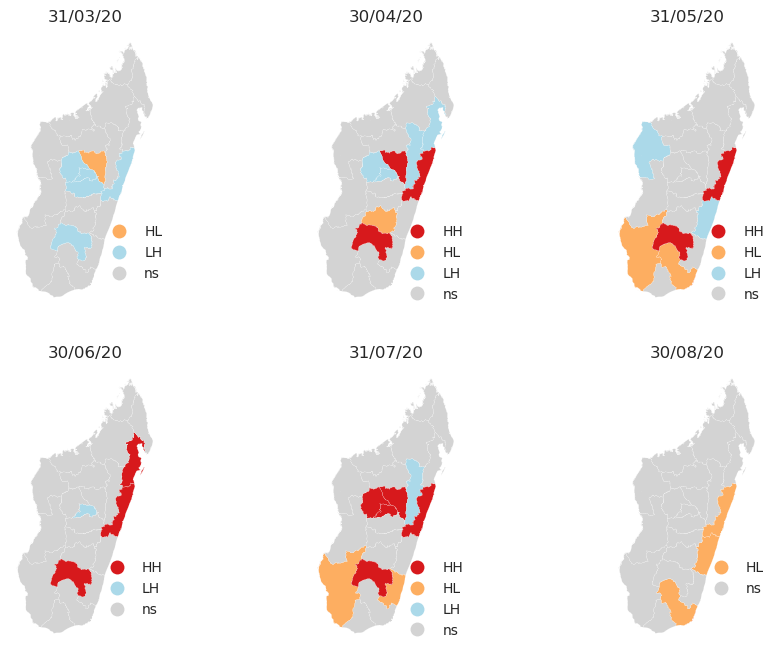

In [21]:
fig,(axs), = plt.subplots(2,3,figsize=(11,8))
moran_loc = Moran_Local(np.array(data.iloc[:,3]).transpose(), w)
lisa_cluster(moran_loc, sf, p=0.1, figsize = (9,9),ax=axs[0,0],legend=True,legend_kwds={'bbox_to_anchor': (1.1, 0.35), 'frameon': False})
axs[0,0].set_title("31/03/20")

moran_loc = Moran_Local(np.array(data.iloc[:,8]).transpose(), w)
lisa_cluster(moran_loc, sf, p=0.1, figsize = (9,9),ax=axs[0,1],legend=True,legend_kwds={'bbox_to_anchor': (1.1, 0.35), 'frameon': False})
axs[0,1].set_title('30/04/20')

moran_loc = Moran_Local(np.array(data.iloc[:,11]).transpose(), w)
lisa_cluster(moran_loc, sf, p=0.1, figsize = (9,9),ax=axs[0,2],legend=True,legend_kwds={'bbox_to_anchor': (1.1, 0.35), 'frameon': False})
axs[0,2].set_title('31/05/20')

moran_loc = Moran_Local(np.array(data.iloc[:,14]).transpose(), w)
lisa_cluster(moran_loc, sf, p=0.1, figsize = (9,9),ax=axs[1,0],legend=True,legend_kwds={'bbox_to_anchor': (1.1, 0.35), 'frameon': False})
axs[1,0].set_title('30/06/20')

moran_loc = Moran_Local(np.array(data.iloc[:,17]).transpose(), w)
lisa_cluster(moran_loc, sf, p=0.1, figsize = (9,9),ax=axs[1,1],legend=True,legend_kwds={'bbox_to_anchor': (1.1, 0.35), 'frameon': False})
axs[1,1].set_title('31/07/20')

moran_loc = Moran_Local(np.array(data.iloc[:,21]).transpose(), w)
lisa_cluster(moran_loc, sf, p=0.1, figsize = (9,9),ax=axs[1,2],legend=True,legend_kwds={'bbox_to_anchor': (1.1, 0.35), 'frameon': False})
axs[1,2].set_title('30/08/20')
plt.savefig("lisa_carte.jpg",dpi=500)
plt.show()
